# Intrusive ROM for reference

In [1]:
import numpy as np
import scipy.linalg as la
import scipy.sparse as sparse
import matplotlib.pyplot as plt
import torch
from sympy.utilities.iterables import multiset_permutations
import pickle

import time
tStart_notebook = time.time()

import sys
sys.path.insert(0, '../source')

from source.FomShallowIce import FomShallowIce
from source.PolyRomIntrusiveShallowIce import PolyRomIntrusiveShallowIce
from source.FoodReprojectionTime import FoodReprojectionTime
from source.FoodTime import FoodTime
import source.comparisons as testing
#from opinf_schemes.ConstrainedOpInf import ConstrainedOpInf
from source.SnapshotTransformer import SnapshotTransformerExtension as SnapshotTransformer
# from fom.FomShallowIce_approx8 import FomShallowIce_approx8
# from opinf_schemes.NestFire import NestFire

import opinf as opinf

import source.helpers_polyMat as polyMat

## Reduced space

In [2]:
with open('data/RB_slicer1', 'rb') as handle:
    [transformer, U_train, VR, nRB, slicer] = pickle.load(handle)
    
nRB = 5

In [3]:
fom = FomShallowIce(Lx=1000, 
                    Lz=1, 
                    orders=[511], 
                    bc_type="N", 
                    dt=1e-3, 
                    init_time=0, 
                    final_time=2)

In [4]:
ROMq = np.zeros(nRB, dtype = object)

for n in range(nRB):
    
    # offline
    ROMq[n] = PolyRomIntrusiveShallowIce(VR[:, :n+1], fom, transformer=transformer)

    tStart = time.time()
    ROMq[n].decompose()
    time_offline = time.time() - tStart
    print("r = {}: Intrusive offline time: ".format(n+1), time_offline, "s.")

r = 1: Intrusive offline time:  0.013971805572509766 s.
r = 2: Intrusive offline time:  0.24341726303100586 s.
r = 3: Intrusive offline time:  3.7832396030426025 s.
r = 4: Intrusive offline time:  1.8107702732086182 s.
r = 5: Intrusive offline time:  9.054893732070923 s.


In [5]:
# with open('intrusive', 'wb') as handle:
#     pickle.dump(ROMq, handle, protocol=pickle.HIGHEST_PROTOCOL)

## Testing

In [6]:
names = ["intrusive", "projection"]
list_ROMq = [ROMq]

with open('data/fom_1e-3', 'rb') as handle:
    [U, grid_t, final_time] = pickle.load(handle)

In [7]:
errors = testing.error_comparison(list_ROMq = list_ROMq, 
                                  list_U_test = [U], 
                                  grid_t = grid_t, 
                                  Xi_test = [None], 
                                  VR = VR)

r = 1: Online compute time: 3.291905164718628 s.
r = 2: Online compute time: 3.8207919597625732 s.
r = 3: Online compute time: 3.821732997894287 s.
r = 4: Online compute time: 5.96618914604187 s.
r = 5: Online compute time: 14.064567804336548 s.


figsize:  10 4


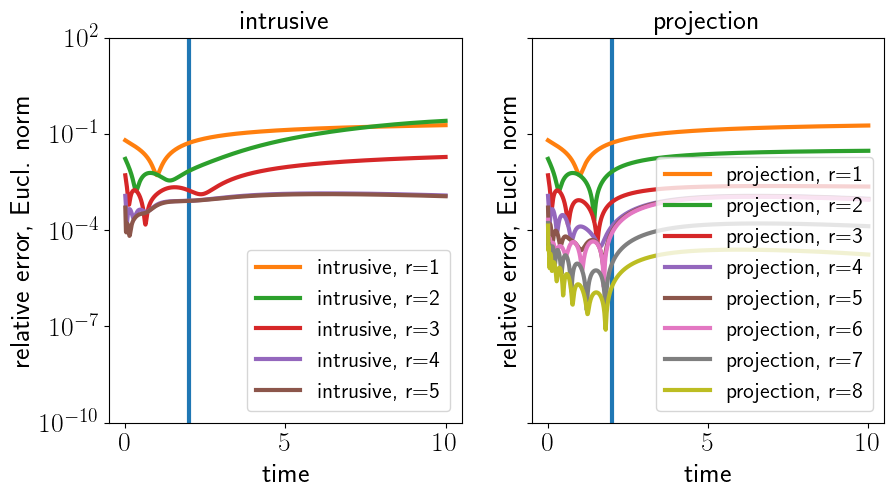

In [8]:
testing.plot_error_comparison_horizontal(errors = errors, 
                              model_indices = [*range(len(names))], 
                              error_indices = [3], 
                              para_index = 0, 
                              final_training_time = 2, 
                              grid_t = grid_t, 
                              names = names)

## The End.

In [9]:
print("Runtime of this notebook: {} min".format((time.time()-tStart_notebook)/60))

Runtime of this notebook: 0.823629625638326 min
